In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [3]:
Data = {"Country" : ["France","Spain","Germany","Spain","Germany","France","Spain","France","Germany","France"],
        "Age": [44,27,30,38,40,35,35,48,50,37],
        "Salary": [72000,48000,54000,61000,50000,58000,52000,79000,83000,67000],
        "Purchased": ["Yes","No","Yes","No","Yes","Yes","No","Yes","No","Yes"]
       }
        

In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [5]:
df= pd.DataFrame(Data)
if 'Unnamed:0' in df.columns:
    df.drop('Unnamed=0',inplace=True)




In [6]:
df.to_csv("Data.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    10 non-null     object
 1   Age        10 non-null     int64 
 2   Salary     10 non-null     int64 
 3   Purchased  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 452.0+ bytes


In [8]:
df.head()

Country  Age  Salary Purchased
0   France   44   72000       Yes
1    Spain   27   48000        No
2  Germany   30   54000       Yes
3    Spain   38   61000        No
4  Germany   40   50000       Yes

In [9]:
#Apply OneHot encoding on 'Country' column
onehot_encoder = OneHotEncoder(drop= "first",sparse_output=False)
country_encoded = onehot_encoder.fit_transform(df[['Country']]) # Avoid dummies trap


In [10]:
# Convert to DataFrame and add column names
country_encoded_df =pd.DataFrame(country_encoded,columns=onehot_encoder.get_feature_names_out(['Country']))

In [11]:
# Apply Label encoding on 'Purchased' column
label_encoder = LabelEncoder()
df['Purchased']=label_encoder.fit_transform(df['Purchased'])

In [12]:
# Combine encoded columns with the original data (excluding original 'Country' column)
df_encoded = pd.concat([country_encoded_df,df.drop('Country', axis=1)],axis=1)

In [13]:
print("Encoded Data: ")
print(df_encoded.head())

Encoded Data: 
   Country_Germany  Country_Spain  Age  Salary  Purchased
0              0.0            0.0   44   72000          1
1              0.0            1.0   27   48000          0
2              1.0            0.0   30   54000          1
3              0.0            1.0   38   61000          0
4              1.0            0.0   40   50000          1


#### 3)	Write a program in python to perform following task : 
 Standardizing Data (transform them into a standard Gaussian distribution with a mean of 0 and a standard deviation of 1) (Use winequality-red.csv)


In [15]:
df1 = pd.read_csv(r"winequality-red.csv",sep=";")

In [16]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
df1.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

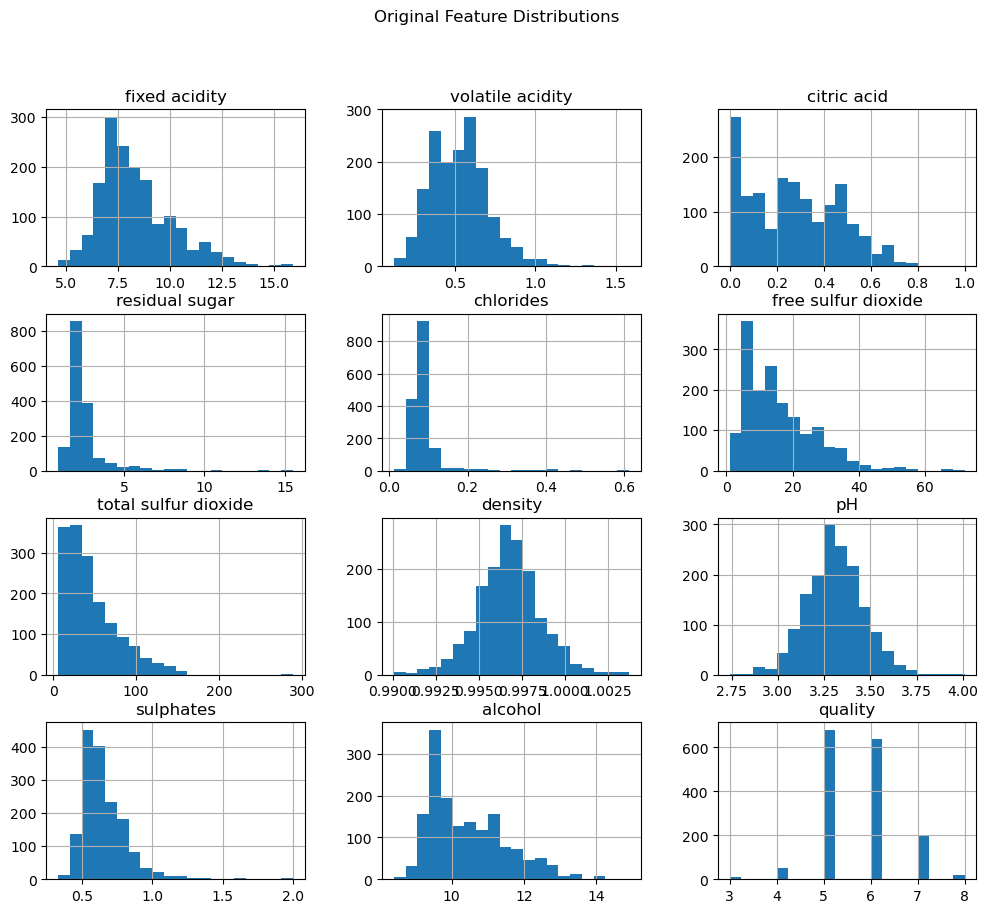

In [18]:

df1.hist(bins=20, figsize=(12, 10))
plt.suptitle("Original Feature Distributions")
plt.show()

In [19]:
# Separate features and target

X = df1.drop("quality", axis=1)
y = df1["quality"]

In [20]:
from sklearn.preprocessing import StandardScaler

# Apply standardization
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [21]:
# Convert back to DataFrame

X_scale_df1 = pd.DataFrame(X_scale,columns=X.columns)

In [22]:
# Combine with target for analysis
df1_standardized= pd.concat([X_scale_df1,y], axis=1)

In [24]:
print(X_scale_df1.describe())

       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   1.599000e+03      1.599000e+03  1.599000e+03    1.599000e+03   
mean    3.554936e-16      1.733031e-16 -8.887339e-17   -1.244227e-16   
std     1.000313e+00      1.000313e+00  1.000313e+00    1.000313e+00   
min    -2.137045e+00     -2.278280e+00 -1.391472e+00   -1.162696e+00   
25%    -7.007187e-01     -7.699311e-01 -9.293181e-01   -4.532184e-01   
50%    -2.410944e-01     -4.368911e-02 -5.636026e-02   -2.403750e-01   
75%     5.057952e-01      6.266881e-01  7.652471e-01    4.341614e-02   
max     4.355149e+00      5.877976e+00  3.743574e+00    9.195681e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  1.599000e+03         1.599000e+03          1.599000e+03  1.599000e+03   
mean   3.732682e-16        -6.221137e-17          4.443669e-17 -3.473172e-14   
std    1.000313e+00         1.000313e+00          1.000313e+00  1.000313e+00   
min   -1.603945e+00        -1.4

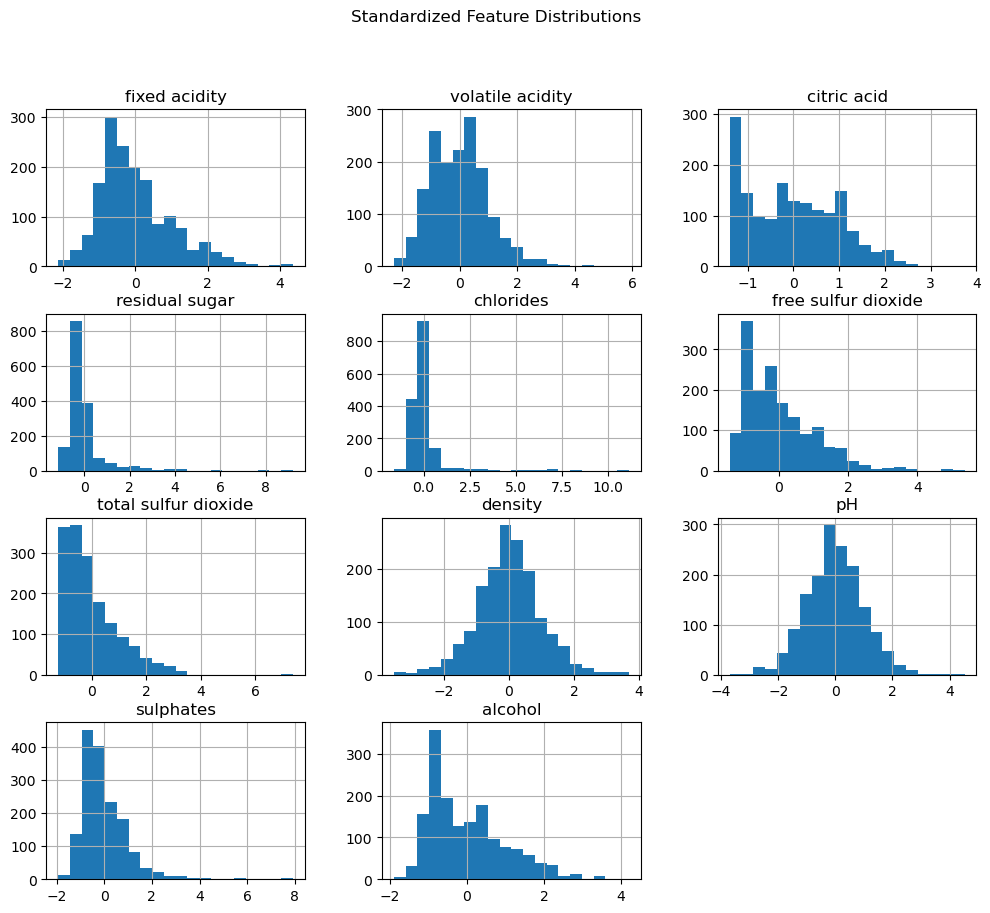

In [25]:
X_scale_df1.hist(bins=20, figsize=(12, 10))
plt.suptitle("Standardized Feature Distributions")
plt.show()